# Artificial Neural Network

### Importing the libraries

In [116]:
import numpy as np  # NumPy: Used for numerical operations and array manipulations
import pandas as pd  # Pandas: Used for data manipulation and analysis
import tensorflow as tf  # TensorFlow: Used for building and training the Artificial Neural Network (ANN)

In [117]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [118]:
# Load the dataset from an Excel file
dataset = pd.read_excel('Folds5x2_pp.xlsx')

# Extracting input features (independent variables) - selecting all columns except the last one
X = dataset.iloc[:, :-1].values

# Extracting the target variable (dependent variable) - selecting only the last column
y = dataset.iloc[:, -1].values

In [119]:
print (X[:10,:])

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 [  20.86   57.32 1010.24   76.64]
 [  10.82   37.5  1009.23   96.62]
 [  26.27   59.44 1012.23   58.77]
 [  15.89   43.96 1014.02   75.24]
 [   9.48   44.71 1019.12   66.43]
 [  14.64   45.   1021.78   41.25]
 [  11.74   43.56 1015.14   70.72]]


In [120]:
print (y[:10,])

[463.26 444.37 488.56 446.48 473.9  443.67 467.35 478.42 475.98 477.5 ]


### Splitting the dataset into the Training set and Test set

In [121]:
from sklearn.model_selection import train_test_split  # Importing function to split the dataset
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  # 20% of the data will be used for testing
                                                    random_state=0)  # Ensures reproducibility of results

In [122]:
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [123]:
# Initializing the Artificial Neural Network (ANN) as a Sequential model
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [124]:
# Adding the first hidden layer with 6 neurons and ReLU activation function
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

### Adding the second hidden layer

In [125]:
# Adding the second hidden layer with 6 neurons and ReLU activation function
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [126]:
# Adding the output layer with 1 neuron (for regression)
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [127]:
# Compiling the ANN model
ann.compile(optimizer='adam',  # Using Adam optimizer for efficient training
            loss='mean_squared_error')  # Using Mean Squared Error (MSE) as the loss function for regression

### Training the ANN model on the Training set

In [128]:
# Training the Artificial Neural Network (ANN) on the training dataset
ann.fit(X_train, y_train,  # Training inputs (X_train) and corresponding target values (y_train)
        batch_size=32,  # Number of samples per batch during training (typical values: 16, 32, 64)
        epochs=100)  # Number of times the entire training dataset is passed through the network

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 204153.0312
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 176454.4062
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92398.0547
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27477.2871
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15982.2998
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10745.2812
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6791.6411
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3926.5642
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2266.2603
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1349.6000
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 871.5648
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 581.2520
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 389.8273
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 298.46

### Predicting the results of the Test set

In [129]:
# Making predictions on the test dataset
y_pred = ann.predict(X_test)  # Predict power output for the test set using the trained ANN

# Setting NumPy print options to display numbers with 2 decimal places for better readability
np.set_printoptions(precision=2)

# Printing predicted vs actual values side by side
print(np.concatenate((y_pred.reshape(len(y_pred), 1),  # Reshape y_pred to a column vector
                      y_test.reshape(len(y_test), 1)), # Reshape y_test to a column vector
                     axis=1))  # Concatenate horizontally (side by side)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[435.26 431.23]
 [458.8  460.01]
 [463.23 461.14]
 ...
 [470.16 473.26]
 [441.36 438.  ]
 [461.59 463.28]]



*   First column → Predicted Power Output
*   Second column → Actual Power Output




In [130]:
ann.save('model.h5')

In [134]:
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=0)

In [135]:
print(history.history)  # Prints all recorded training metrics

{'loss': [19.63532829284668, 19.640295028686523, 19.525897979736328, 19.49110221862793, 19.65479850769043, 19.449413299560547, 19.437742233276367, 19.632049560546875, 19.398710250854492, 19.5789794921875, 19.60541534423828, 19.409381866455078, 19.48548126220703, 19.69166374206543, 19.473804473876953, 19.540454864501953, 19.740673065185547, 19.63831329345703, 19.614519119262695, 19.563838958740234, 19.700071334838867, 19.42900848388672, 19.42774772644043, 19.483320236206055, 19.624326705932617, 19.458084106445312, 19.898935317993164, 19.40787696838379, 19.481548309326172, 19.614063262939453, 19.460542678833008, 19.415258407592773, 19.493877410888672, 19.58549690246582, 19.428617477416992, 19.4417667388916, 19.532991409301758, 19.449243545532227, 19.563447952270508, 19.277189254760742, 19.510242462158203, 19.582239151000977, 19.483131408691406, 19.6113338470459, 19.270946502685547, 19.29518699645996, 19.624187469482422, 19.43439483642578, 19.519813537597656, 19.550928115844727, 19.490417

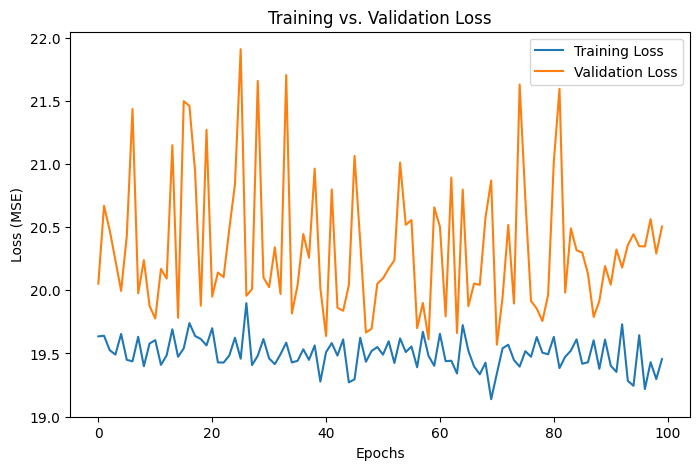

In [136]:
import matplotlib.pyplot as plt

# Visualize Training Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs. Validation Loss')
plt.legend()
#plt.grid(True)
plt.show()


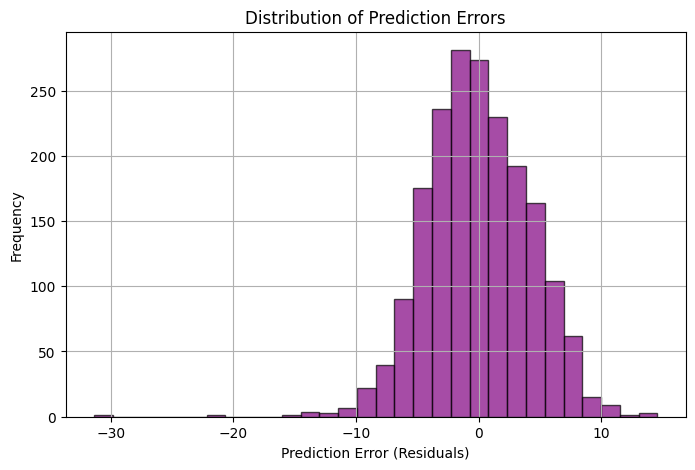

In [137]:
errors = y_test - y_pred.reshape(-1)

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Prediction Error (Residuals)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()


In [138]:
print("Mean Residual (Error):", np.mean(errors))
print("Standard Deviation of Residuals:", np.std(errors))


Mean Residual (Error): -0.06270239436389748
Standard Deviation of Residuals: 4.18932896368041
